In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from sklearn import linear_model, ensemble
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("retail_price.csv");
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [5]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [6]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [7]:
df['month_year'] = pd.to_datetime(df['month_year'])
df['month_year'] = df['month_year'].map(dt.datetime.toordinal)
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,736334,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,736335,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,736336,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,736337,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,736338,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,736334,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,736335,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,736336,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,736337,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [10]:
df_bed = df[df['product_id'] == 'bed3']
df_bed

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
409,bed3,bed_bath_table,736339,8,792.00,16.353750,99.000,55,312,1,...,89.900000,3.9,21.572143,99.000,3.3,16.353750,45.950000,4.0,15.100000,98.950
410,bed3,bed_bath_table,736340,22,2178.00,18.796364,99.000,55,312,1,...,89.900000,3.9,16.294000,99.000,3.3,18.796364,40.531818,4.0,15.832727,99.000
411,bed3,bed_bath_table,736341,7,693.00,18.662857,99.000,55,312,1,...,88.488235,3.9,18.898333,99.000,3.3,18.662857,39.990000,4.0,15.230000,99.000
412,bed3,bed_bath_table,736695,11,1082.00,16.397273,98.300,55,312,1,...,86.900000,3.9,19.383529,98.300,3.3,16.397273,39.990000,4.0,16.533684,99.000
413,bed3,bed_bath_table,736696,13,1196.00,16.194615,92.000,55,312,1,...,86.900000,3.9,19.209091,92.000,3.3,16.194615,39.990000,4.0,13.749444,98.300
414,bed3,bed_bath_table,736697,3,276.00,14.043333,92.000,55,312,1,...,86.900000,3.9,19.982353,92.000,3.3,14.043333,39.990000,4.0,16.462353,92.000
415,bed3,bed_bath_table,736698,9,815.00,17.822222,90.875,55,312,1,...,85.045000,3.9,12.940000,90.875,3.3,17.822222,39.990000,4.0,14.236154,92.000
416,bed3,bed_bath_table,736699,14,1235.36,9.212857,88.240,55,312,1,...,83.649615,3.9,16.780385,88.240,3.3,9.212857,39.990000,4.0,10.256316,90.875
417,bed3,bed_bath_table,736700,14,1188.60,17.975000,84.900,55,312,1,...,79.900000,3.9,23.005652,84.900,3.3,17.975000,39.990000,4.0,13.998000,88.240
418,bed3,bed_bath_table,736701,9,764.10,22.447778,84.900,55,312,1,...,77.933333,3.9,19.952000,84.900,3.3,22.447778,39.990000,4.0,20.417500,84.900


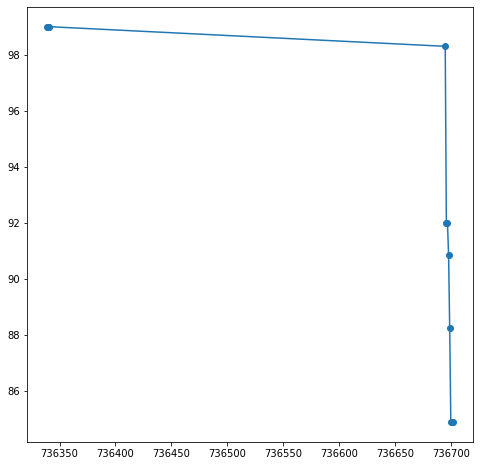

In [11]:
plt.figure(figsize=(8,8))
plt.plot(df_bed['month_year'], df_bed['unit_price'], marker='o')
plt.show()

In [66]:
df['product_id'] = pd.factorize(df['product_id'])[0]
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,0,bed_bath_table,736334,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,0,bed_bath_table,736335,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,0,bed_bath_table,736336,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,0,bed_bath_table,736337,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,0,bed_bath_table,736338,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,51,bed_bath_table,736334,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,51,bed_bath_table,736335,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,51,bed_bath_table,736336,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,51,bed_bath_table,736337,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


<AxesSubplot: >

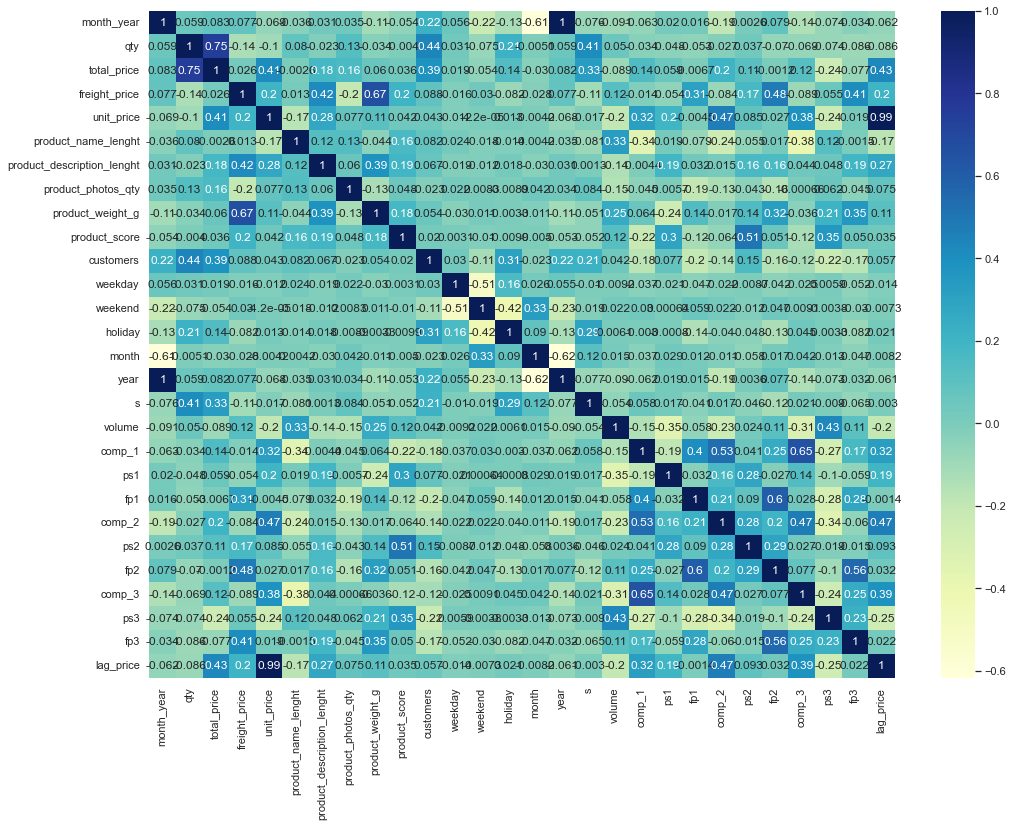

In [67]:
X = df.drop(['product_category_name', 'product_id'], axis=1)
sns.set(rc={'figure.figsize':(16.7,12.27)})
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [68]:
# df = df[['product_id', 'product_category_name', 'month_year', 'total_price', 'product_description_lenght', 'comp_1', 'comp_2', 'comp_3', 'unit_price']]
df = df.drop(['lag_price', 'month', 'year', 's'], axis=1)
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3
0,0,bed_bath_table,736334,1,45.95,15.100000,45.950000,39,161,2,...,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000
1,0,bed_bath_table,736335,3,137.85,12.933333,45.950000,39,161,2,...,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333
2,0,bed_bath_table,736336,6,275.70,14.840000,45.950000,39,161,2,...,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000
3,0,bed_bath_table,736337,4,183.80,14.287500,45.950000,39,161,2,...,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500
4,0,bed_bath_table,736338,2,91.90,15.100000,45.950000,39,161,2,...,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,51,bed_bath_table,736334,1,215.00,8.760000,215.000000,56,162,5,...,12600,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000
672,51,bed_bath_table,736335,10,2090.00,21.322000,209.000000,56,162,5,...,12600,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333
673,51,bed_bath_table,736336,59,12095.00,22.195932,205.000000,56,162,5,...,12600,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000
674,51,bed_bath_table,736337,52,10375.00,19.412885,199.509804,56,162,5,...,12600,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500


In [69]:
X = df.drop(['unit_price', 'product_category_name'], axis=1)
y = df['unit_price']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [70]:
models = [linear_model.LinearRegression(normalize=False), 
          linear_model.Lasso(alpha=0.2), 
          linear_model.Ridge(alpha=.5),
          ensemble.RandomForestRegressor(),
          ensemble.GradientBoostingRegressor(),
          ensemble.BaggingRegressor(base_estimator=linear_model.LinearRegression(), n_estimators=15)]

vals = []
col = ['Test Score', 'RMSE']
ind = [type(x).__name__ for x in models]

for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_valid)
    RMSE = metrics.mean_squared_error(y_valid, y_preds)**0.5
    score = model.score(X_valid, y_valid)
    vals.append([score, RMSE])

met = pd.DataFrame(data=vals,columns=col,index=ind)
met.sort_values(by='Test Score', ascending=False)

c:\Users\robin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,Test Score,RMSE
RandomForestRegressor,0.956478,14.550563
GradientBoostingRegressor,0.942101,16.782687
BaggingRegressor,0.525825,48.028092
Lasso,0.523957,48.122616
Ridge,0.521853,48.228850
LinearRegression,0.520934,48.275177


c:\Users\robin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


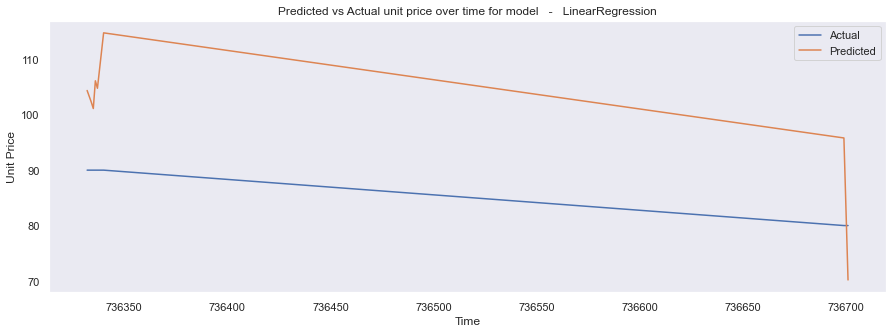

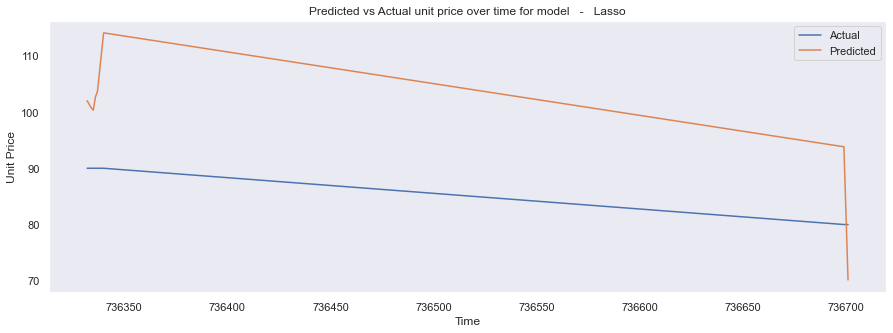

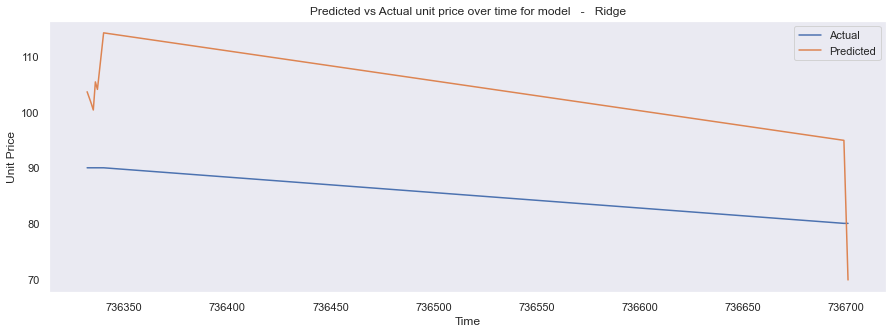

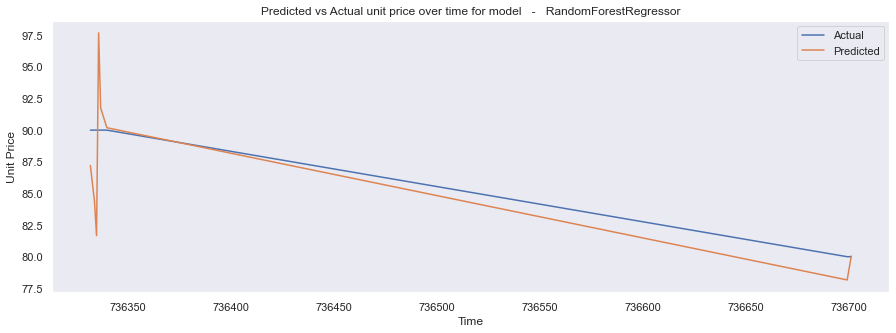

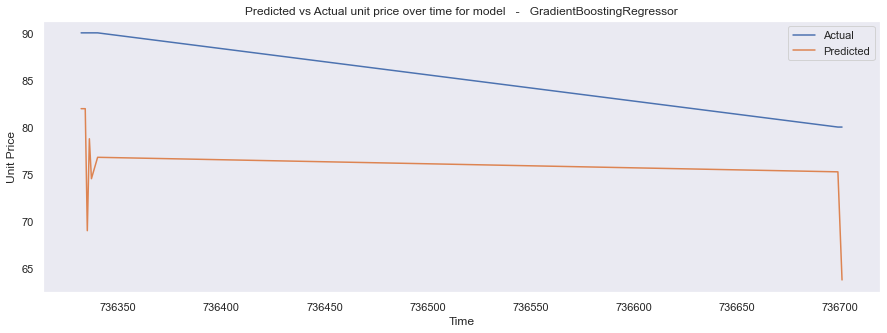

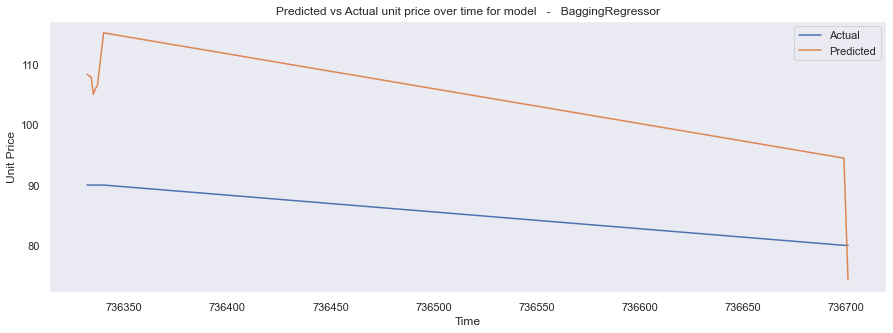

In [74]:
test = pd.concat([X_valid, y_valid], axis=1).sort_values('month_year')
test_prod_id = test[test['product_id']==9]
for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(test_prod_id.drop('unit_price', axis=1))
    plt.figure(figsize=(15,5))
    plt.plot(test_prod_id['month_year'], test_prod_id['unit_price'], label='Actual')
    plt.plot(test_prod_id['month_year'], y_preds, label='Predicted')
    plt.title("Predicted vs Actual unit price over time for model   -   {}".format(type(model).__name__))
    plt.xlabel("Time")
    plt.ylabel("Unit Price")
    plt.grid()
    plt.legend()